In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("./heart.csv")
#I am essentially throwing out all data with cholesterol levels =0
#I am assuming that data will be bad for the analysis since i belive 
#It is impossible to have a cholesterol level of 0
heart_disease =heart_disease[heart_disease["Cholesterol"] > 0]
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Creating 2 Subplots to display Cholesterol and Max Heart Rate vs Resting Blood Pressure

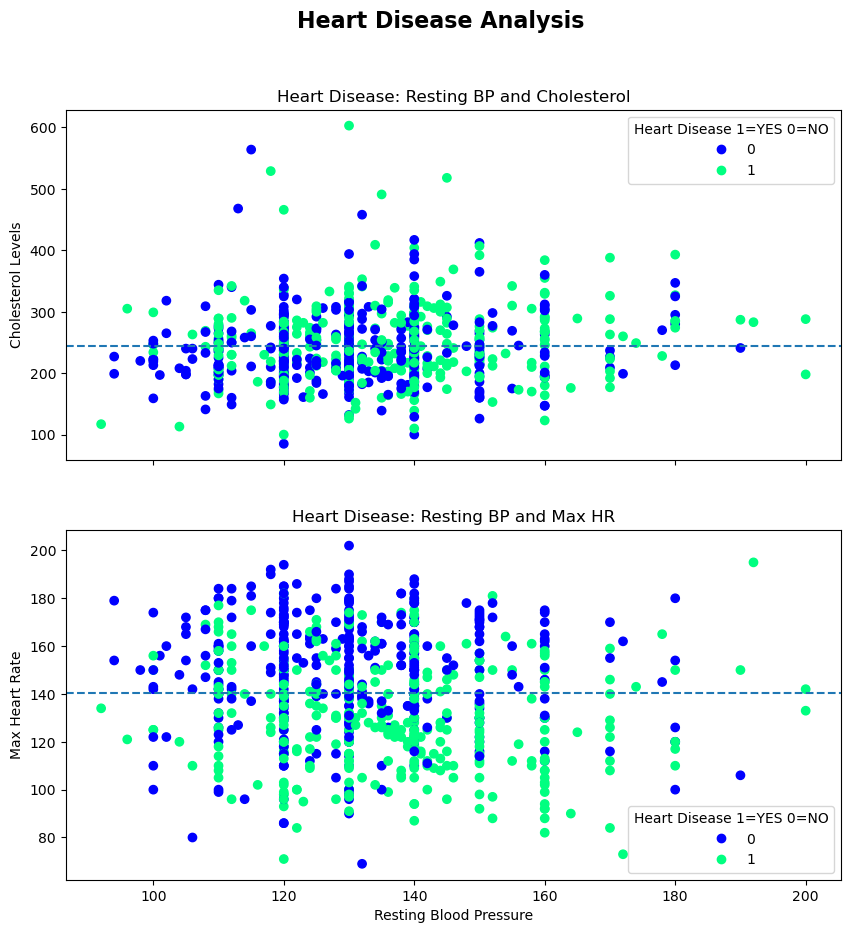

In [3]:
import matplotlib.pyplot as plt
#subplots of chol, MaxHR, and Resting BP
fig, (ax0,ax1) = plt.subplots(nrows =2,
                              ncols = 1,
                              figsize = (10,10),
                              sharex = True);
#add data to ax0 
scatter = ax0.scatter(x=heart_disease["RestingBP"],
                      y=heart_disease["Cholesterol"],
                      c= heart_disease["HeartDisease"],
                      cmap = "winter")
#customize ax0
ax0.set(title = "Heart Disease: Resting BP and Cholesterol",
        ylabel = "Cholesterol Levels")

# add legend to ax0
ax0.legend(*scatter.legend_elements(), title = 'Heart Disease 1=YES 0=NO')

#add mean data line trend
ax0.axhline(y=heart_disease["Cholesterol"].mean(),
            linestyle = "--")

#add data to ax1
scatter = ax1.scatter(x=heart_disease["RestingBP"],
                      y=heart_disease["MaxHR"],
                      c = heart_disease["HeartDisease"],
                      cmap="winter")

#customize ax1
ax1.set(title = "Heart Disease: Resting BP and Max HR",
        xlabel = "Resting Blood Pressure",
        ylabel = "Max Heart Rate")

#add legend to ax1
ax1.legend(*scatter.legend_elements(), title = 'Heart Disease 1=YES 0=NO')

#add a mean line
ax1.axhline(y = heart_disease["MaxHR"].mean(),
            linestyle = '--');

#add title to fig
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");

## Create Histogram to Illustrate Age Bands vs Heart Disease

C:\Users\Cindy\AppData\Local\Temp\ipykernel_17396\3382894083.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_band_counts = heart_disease.groupby("AgeBand")["HeartDisease"].sum()


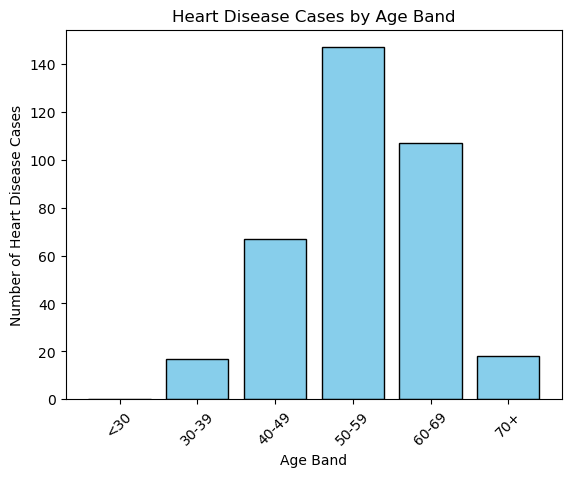

In [5]:
# Define age bands
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ["<30", "30-39", "40-49", "50-59", "60-69", "70+"]

# Add 'AgeBand' column temporarily to the original DataFrame
heart_disease["AgeBand"] = pd.cut(heart_disease["Age"], bins=bins, labels=labels, right=False)

#group by AgeBand and calculate heart disease cases
age_band_counts = heart_disease.groupby("AgeBand")["HeartDisease"].sum()

#plot histogram
plt.bar(age_band_counts.index.astype(str), age_band_counts, color="skyblue", edgecolor="black")
plt.title("Heart Disease Cases by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Number of Heart Disease Cases")
plt.xticks(rotation=45)
plt.show()

#remove ageband
heart_disease = heart_disease.drop(columns=["AgeBand"])

In [6]:
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
#Check for Nan Vals 
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart_disease.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
#Convert data into numbers for ML model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                  one_hot,
                                  categorical_features)],
                                remainder= "passthrough")
transformed_X = transformer.fit_transform(heart_disease)
transformed_X

array([[  0. ,   1. ,   0. , ..., 172. ,   0. ,   0. ],
       [  1. ,   0. ,   0. , ..., 156. ,   1. ,   1. ],
       [  0. ,   1. ,   0. , ...,  98. ,   0. ,   0. ],
       ...,
       [  0. ,   1. ,   1. , ..., 115. ,   1.2,   1. ],
       [  1. ,   0. ,   0. , ..., 174. ,   0. ,   1. ],
       [  0. ,   1. ,   0. , ..., 173. ,   0. ,   0. ]])

In [11]:
import pandas as pd

# Get the column names for the one-hot encoded features
one_hot_features = transformer.named_transformers_["one hot"].get_feature_names_out(categorical_features)

# Combine one-hot encoded column names with the remaining numeric column names
numeric_features = [col for col in heart_disease.columns if col not in categorical_features]
all_features = list(one_hot_features) + numeric_features

# Transform back into a DataFrame
transformed_df = pd.DataFrame(transformed_X, columns=all_features)
transformed_df

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2,1.0
742,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4,1.0
743,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2,1.0
744,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0,1.0


In [12]:
#After consulting https://scikit-learn.org/stable/machine_learning_map.html (scikitlearn map)
#The model I am going to use first is Linear SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#create the data
X= heart_disease.drop("HeartDisease", axis =1)
y= heart_disease["HeartDisease"]

# Transform X using the fitted transformer
transformed_X = transformer.fit_transform(X)

#split the data
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=.2)

#instantiate Linear SVC
clf = LinearSVC(max_iter = 100000)
clf.fit(X_train,y_train)

#eval linearSVC
clf.score(X_test,y_test)

C:\Users\Cindy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Cindy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.74

## I like RandomForestClassifier so going to try that now to see if we can improve

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#create the data
X= heart_disease.drop("HeartDisease", axis =1)
y= heart_disease["HeartDisease"]

# Transform X using the fitted transformer
transformed_X = transformer.fit_transform(X)

#split the data
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=.2)

#instantiate RFC
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#eval RFC
clf.score(X_test,y_test)

0.8933333333333333

In [15]:
## Now getting mean cross val scores to see ensure our .89 score isnt an outlier
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(clf,transformed_X,y, cv=5)
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Accuracy: 85.38%


## Confusion Matricies

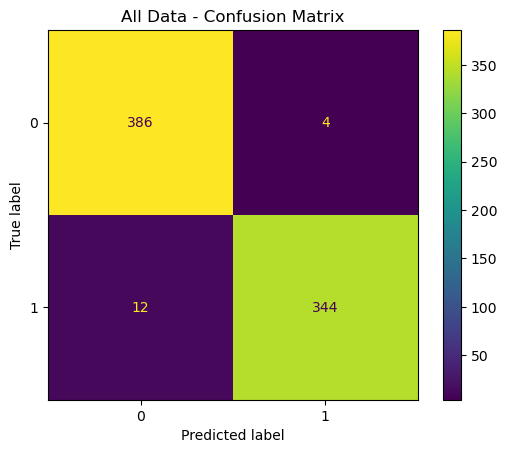

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=transformed_X, y=y)

# Add a title to the confusion matrix plot
plt.title("All Data - Confusion Matrix")

# Show the plot
plt.show()

In [18]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

#widgets
age_widget = widgets.IntSlider(value=40, min=20, max=80, description='Age')
resting_bp_widget = widgets.IntSlider(value=120, min=80, max=200, description='RestingBP')
cholesterol_widget = widgets.IntSlider(value=200, min=100, max=400, description='Cholesterol')
max_hr_widget = widgets.IntSlider(value=150, min=60, max=220, description='MaxHR')
oldpeak_widget = widgets.FloatSlider(value=0.0, min=0.0, max=6.0, step=0.1, description='Oldpeak')

sex_widget = widgets.Dropdown(options=['M', 'F'], value='M', description='Sex')
chest_pain_widget = widgets.Dropdown(options=['ATA', 'NAP', 'ASY', 'TA'], value='ATA', description='ChestPainType')
fasting_bs_widget = widgets.ToggleButtons(options=[0, 1], value=0, description='FastingBS')
exercise_angina_widget = widgets.ToggleButtons(options=['Y', 'N'], value='N', description='ExerciseAngina')
st_slope_widget = widgets.Dropdown(options=['Up', 'Flat', 'Down'], value='Up', description='ST_Slope')
resting_ecg_widget = widgets.Dropdown(options=['Normal', 'ST', 'LVH'], value='Normal', description='RestingECG')

# Button widget for triggering prediction
predict_button = widgets.Button(description="Predict Heart Disease")

# Output area to display information when button is clicked
output = widgets.Output()

# Display all widgets (excluding the button, which will be at the bottom)
display(age_widget, sex_widget, chest_pain_widget, resting_bp_widget, cholesterol_widget, 
        fasting_bs_widget, max_hr_widget, exercise_angina_widget, oldpeak_widget, 
        st_slope_widget, resting_ecg_widget)

# Now display the button at the bottom
display(predict_button, output)

# Debug function for button click
def on_button_click(b):
    with output:
        # Clear the previous output
        clear_output(wait=True)
        
        # Collect input values
        input_data = {
            "Age": age_widget.value,
            "Sex": sex_widget.value,
            "ChestPainType": chest_pain_widget.value,
            "RestingBP": resting_bp_widget.value,
            "Cholesterol": cholesterol_widget.value,
            "FastingBS": fasting_bs_widget.value,
            "MaxHR": max_hr_widget.value,
            "ExerciseAngina": exercise_angina_widget.value,
            "Oldpeak": oldpeak_widget.value,
            "ST_Slope": st_slope_widget.value,
            "RestingECG": resting_ecg_widget.value
        }
        
        # Show the collected input values
        print("Collected input values:")
        for key, value in input_data.items():
            print(f"{key}: {value}")
        
        # Transform the input data into the correct format for the model
        input_df = pd.DataFrame([input_data])
        transformed_input = transformer.transform(input_df)
        
        # Make the prediction using the trained model
        prediction = clf.predict(transformed_input)
        prediction_proba = clf.predict_proba(transformed_input)[:, 1]  # Probability of having heart disease
        
        # Display the result
        if prediction[0] == 1:
            print(f"There is a {prediction_proba[0]*100:.2f}% chance you have heart disease.")
        else:
            print(f"There is a {100 - prediction_proba[0]*100:.2f}% chance you do not have heart disease.")

# Link the button to the function
predict_button.on_click(on_button_click)

IntSlider(value=40, description='Age', max=80, min=20)

Dropdown(description='Sex', options=('M', 'F'), value='M')

Dropdown(description='ChestPainType', options=('ATA', 'NAP', 'ASY', 'TA'), value='ATA')

IntSlider(value=120, description='RestingBP', max=200, min=80)

IntSlider(value=200, description='Cholesterol', max=400, min=100)

ToggleButtons(description='FastingBS', options=(0, 1), value=0)

IntSlider(value=150, description='MaxHR', max=220, min=60)

ToggleButtons(description='ExerciseAngina', index=1, options=('Y', 'N'), value='N')

FloatSlider(value=0.0, description='Oldpeak', max=6.0)

Dropdown(description='ST_Slope', options=('Up', 'Flat', 'Down'), value='Up')

Dropdown(description='RestingECG', options=('Normal', 'ST', 'LVH'), value='Normal')

Button(description='Predict Heart Disease', style=ButtonStyle())

Output()